<a href="https://colab.research.google.com/github/pswaruppk/GL_CAPSTONE/blob/master/retina152_unpickling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deploying retinanet model

In [ ]:
import os
import shutil;
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Google drive https://drive.google.com/file/d/1AvTpQf2eF4AWaVTtPBOb3JWL4VHl5Gfg/view?usp=sharing
pipefile = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/model_v1.pk'
PIPE_FILE = 'model_v1.pk'
shutil.copy(pipefile, PIPE_FILE)

'model_v1.pk'

- The pickle file needs to be installed in the production run area.

In [ ]:
import dill
with open('./'+PIPE_FILE ,'rb') as f:
    loaded_pipe = dill.load(f)
loaded_pipe[0].setup()

- The user has to load the pickel file in the server for prediction of the input images.

In [ ]:
#Google drive https://drive.google.com/file/d/1-HKUeHksV3xcsJbLMss9_gIzaNG8_oa6/view?usp=sharing
modelfile = '/content/drive/My Drive/Option-1.Retinanet/resnet152model_2.h5'
MODEL_LOCAL = 'model.h5'
shutil.copy(modelfile, MODEL_LOCAL)
loaded_pipe[1].loadModel(MODEL_LOCAL)

Loading saved model
Model Loading done


- tf_stack.summary object was not pickable and erroring out. So we made a workaround soultion to load the model from the pipeline. 

In [ ]:
print("Predicting with DCM file")
import pydicom 
loaded_pipe[0].setXrayType(True)
#PNEUMONIA
sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/cd1d42a0-e085-4f64-baaf-1da212416e8d.dcm' #+ve
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/8d09cad6-5aec-48fc-8c66-1b5e7c144ac8.dcm' #+ve
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/dc506eb1-ef59-41e8-aebd-5c2a80026ba3.dcm' #+ve
# # sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/b75a77fe-d336-4c9f-994f-3d158521fa28.dcm' #+ve
# # sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/ed20cdc6-e8f7-4551-a8d5-6b360b3f9c71.dcm' #+ve
# #NOT NORMAL
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/effc3b6b-4088-41e6-a06a-cfad22c0e1da.dcm' #-ve Not Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/83fdefc4-082e-409d-80dd-7b043aed85ad.dcm' #-ve Not Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/7200a1e9-eba0-4ced-bdd3-88544f162af0.dcm' #-ve Not Normal, predicted with 37% confidence
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/ddc4c65f-8a3b-4446-aa52-6f9a78577dd3.dcm' #-ve Not Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/e181104a-93bc-4289-a7b7-a651f79540e5.dcm' #-ve Not Normal, mis classified with high confidence
# #NORMAL
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/b18e9b1c-e430-4200-8553-e585e0c49afc.dcm' #-ve Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/55f2867a-5c49-4ea2-a9d7-9f8bb977222c.dcm' #-ve Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/3ebf4e25-fb47-4040-a1f3-236fdad3e0f7.dcm' #-ve Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/4de1459a-541e-4449-bbbd-38f829c4d4f5.dcm' #-ve Normal
# sample = '/content/drive/My Drive/rsna-pneumonia-detection-challenge/stage_2_train_images/4da6faee-c4af-4ea4-84a3-7c5733bfd249.dcm' #-ve Normal



Predicting with DCM file


- The frontend created will pass the image to the server and also pass the information about the type of image input. 
- The user can pass any DICOM image. However, we have provided above some samples for for testing in the interim for prediction. 

Calling PreProcessing transform 
Predicting using custom predictor:


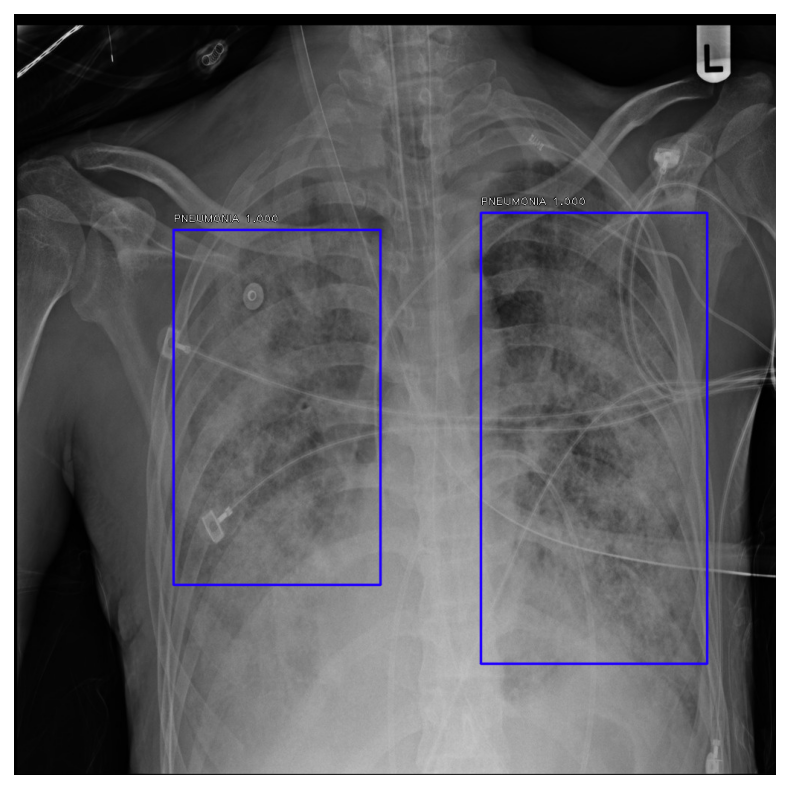

1

In [ ]:
from keras_retinanet.utils.colors import label_color
loaded_pipe.predict(sample)

In [ ]:
print("Predicting with JPG file")
loaded_pipe[0].setXrayType(False)

sample = '/content/drive/My Drive/Option-1.Retinanet/stage_2_train_images/a20c1c8f-e16e-440b-89d0-2393ea43b340.jpg' #+ve case

Predicting with JPG file


- When the file to be passed is JPG we will have to set the serXray to False.

Calling PreProcessing transform 
Predicting using custom predictor:


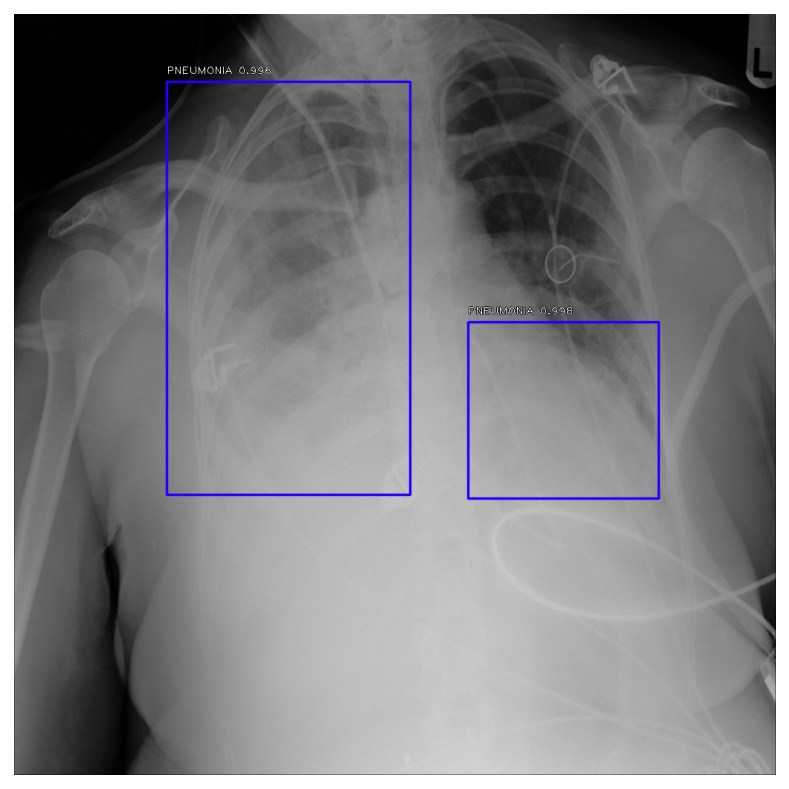

1

In [ ]:

loaded_pipe.predict(sample)